In [20]:
#load the libraries and titanic data
#you can find it here :  https://www.kaggle.com/c/titanic/data 

import pandas as pd

titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
#print the dataset shape

print(titanic.shape)

(891, 12)


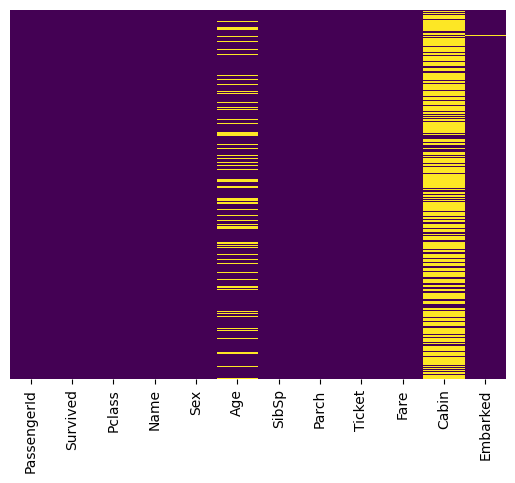

In [22]:
#plot the NaN values with a heatmap
#matplotlib.axes._subplots.AxesSubplot
import matplotlib.pyplot as plt

import seaborn as sns

sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [23]:
#print the age % of NaN values
print(titanic['Age'].isnull().sum()/len(titanic)*100)

19.865319865319865


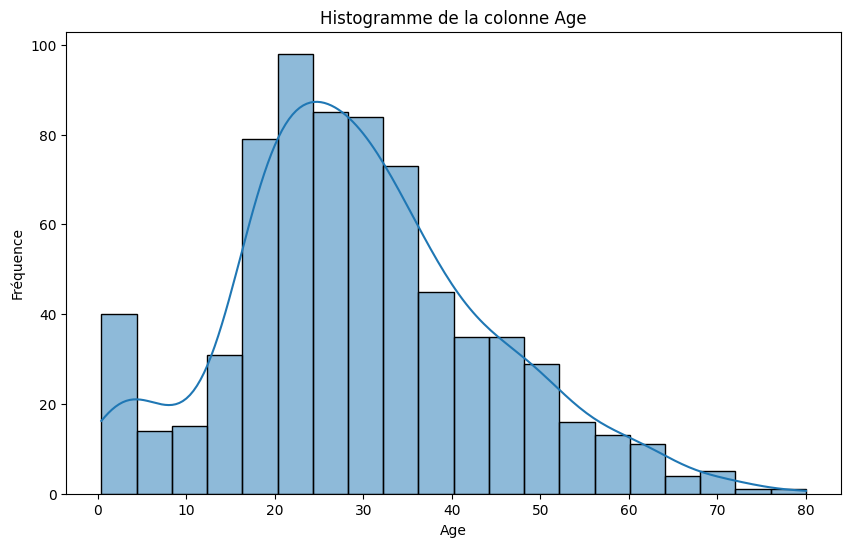

In [24]:
#print the histogram of the age column
plt.figure(figsize=(10, 6))
sns.histplot(data= titanic, x='Age', kde=True)
plt.title('Histogramme de la colonne Age')
plt.xlabel('Age')
plt.ylabel('Fréquence')
# Sauvegarde du graphique (optionnel)
plt.savefig('age_histogram.png')
plt.show()

In [25]:
#print the median and the mean of the age column

print(titanic['Age'].median())
print(titanic['Age'].mean())

28.0
29.69911764705882


In [26]:
#print the cabin % of NaN values
print(titanic['Cabin'].isnull().sum()/len(titanic)*100)


77.10437710437711


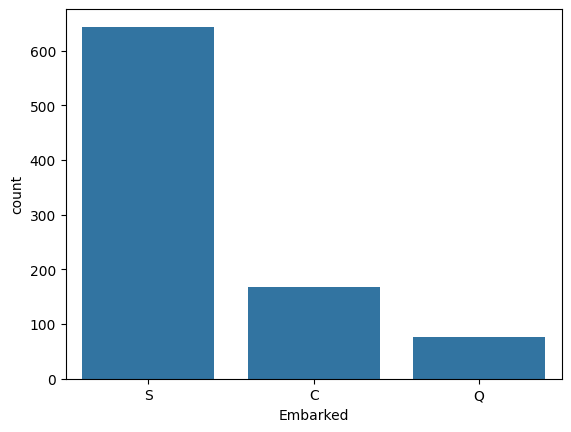

In [27]:
#print the embarked distribution 

sns.countplot(x='Embarked',data=titanic)
plt.show()

In [37]:
# We will make the following changes to the data:

# If "Age" is missing for a given row, we assign 28 (median age).
# If "Embarked" is missing for a given line, we assign "S" (most common embarked).
# We will ignore "Cabin" as a variable. There are too many missing values ​​it wouldn't make sense to assign values ​​to it.
#apply the preprocessing like above
#verify your results


titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna('S', inplace=True)
titanic = titanic.drop("cabin", axis=1)




/var/folders/s_/531btfb97_q2k843yjsr9qm80000gn/T/ipykernel_83623/373716519.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
/var/folders/s_/531btfb97_q2k843yjsr9qm80000gn/T/ipykernel_83623/373716519.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

KeyError: "['cabin'] not found in axis"